# Problem Statement

**To Predict the sales price of each house.**

## Business Objective:

**This project implements a machine learning solution that analyze the various house dimesnsions to predict sales price,
helping stakeholders to make data-driven decisions.**

## Goal Setting:

In today's dynamic real estate market, accurate house sales price prediction is crucial for various stakeholders:

- **Home Buyers** : want to ensure they're making fair offer.
- **Real Estate Agent** : Need realiable price estimate to advise client effectively.
- **Investors** : Require accurate valuation for investment decisions.
- **Sellers** : Need to set competitive listing price.

# Import Libraries

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sidetable
from sklearn.feature_selection import f_regression, r_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from itertools import combinations
from collections import defaultdict
from typing import List, Tuple, Union, Any, Dict
import scipy.stats as stats 
from collections import defaultdict


## Display Setting 

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# Set the number of decimal places to 2
pd.set_option('display.float_format', '{:.2f}'.format)

## Data Ingestion & Basic Understanding

In [3]:
path = Path.cwd().parent
files = []
for i in path.rglob('*.csv*'):
    files.append(i)
    print(i.name)
    print(files.index(i),' ',i)


sample_submission.csv
0   e:\house_price_prediction\Real-Estate-Price-Prediction\data\raw\extracted\sample_submission.csv
test.csv
1   e:\house_price_prediction\Real-Estate-Price-Prediction\data\raw\extracted\test.csv
train.csv
2   e:\house_price_prediction\Real-Estate-Price-Prediction\data\raw\extracted\train.csv


In [4]:
df_test = pd.read_csv(files[1])
df_test.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [5]:
df_train = pd.read_csv(files[2])
df_train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [6]:
df_train.tail(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,1460,20,RL,75.00,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.00,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.00,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
df_train.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1117,1118,20,RL,57.00,9764,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,7,1967,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.00,TA,TA,CBlock,TA,TA,No,BLQ,702,Unf,0,192,894,GasA,Ex,Y,SBrkr,894,0,0,894,1,0,1,0,3,1,Gd,5,Typ,0,NaN,Attchd,1967.00,RFn,2,450,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,130000


In [8]:
df_train.shape
print('Number of rows :', df_train.shape[0])
print('Number of columns :', df_train.shape[1])

Number of rows : 1460
Number of columns : 81


In [9]:
# remove whitespace from columns
df_train.columns = df_train.columns.str.strip()

df_test.columns = df_test.columns.str.strip()

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The data was collected by De Cock where 81 dimensions were recorded for 1460 properties in Ames IA.

Brief description of columns:

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.

- **MSSubClass**: The building class

- **MSZoning**: The general zoning classification

- **LotFrontage**: Linear feet of street connected to property

- **LotArea**: Lot size in square feet

- **Street**: Type of road access

- **Alley**: Type of alley access

- **LotShape**: General shape of property

- **LandContour**: Flatness of the property

- **Utilities**: Type of utilities available

- **LotConfig**: Lot configuration

- **LandSlope**: Slope of property

- **Neighborhood**: Physical locations within Ames city limits

- **Condition1**: Proximity to main road or railroad

- **Condition2**: Proximity to main road or railroad (if a second is present)

- **BldgType**: Type of dwelling

- **HouseStyle**: Style of dwelling

- **OverallQual**: Overall material and finish quality

- **OverallCond**: Overall condition rating

- **YearBuilt**: Original construction date

- **YearRemodAdd**: Remodel date

- **RoofStyle**: Type of roof

- **RoofMatl**: Roof material

- **Exterior1st**: Exterior covering on house

- **Exterior2nd**: Exterior covering on house (if more than one material)

- **MasVnrType**: Masonry veneer type

- **MasVnrArea**: Masonry veneer area in square feet

- **ExterQual**: Exterior material quality

- **ExterCond**: Present condition of the material on the exterior

- **Foundation**: Type of foundation

- **BsmtQual**: Height of the basement

- **BsmtCond**: General condition of the basement

- **BsmtExposure**: Walkout or garden level basement walls

- **BsmtFinType1**: Quality of basement finished area

- **BsmtFinSF1**: Type 1 finished square feet

- **BsmtFinType2**: Quality of second finished area (if present)

- **BsmtFinSF2**: Type 2 finished square feet

- **BsmtUnfSF**: Unfinished square feet of basement area

- **TotalBsmtSF**: Total square feet of basement area

- **Heating**: Type of heating

- **HeatingQC**: Heating quality and condition

- **CentralAir**: Central air conditioning

- **Electrical**: Electrical system

- **1stFlrSF**: First Floor square feet

- **2ndFlrSF**: Second floor square feet

- **LowQualFinSF**: Low quality finished square feet (all floors)

- **GrLivArea**: Above grade (ground) living area square feet

- **BsmtFullBath**: Basement full bathrooms

- **BsmtHalfBath**: Basement half bathrooms

- **FullBath**: Full bathrooms above grade

- **HalfBath**: Half baths above grade

- **Bedroom**: Number of bedrooms above basement level

- **Kitchen**: Number of kitchens

- **KitchenQual**: Kitchen quality

- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

- **Functional**: Home functionality rating

- **Fireplaces**: Number of fireplaces

- **FireplaceQu**: Fireplace quality

- **GarageType**: Garage location

- **GarageYrBlt**: Year garage was built

- **GarageFinish**: Interior finish of the garage

- **GarageCars**: Size of garage in car capacity

- **GarageArea**: Size of garage in square feet

- **GarageQual**: Garage quality

- **GarageCond**: Garage condition

- **PavedDrive**: Paved driveway

- **WoodDeckSF**: Wood deck area in square feet

- **OpenPorchSF**: Open porch area in square feet

- **EnclosedPorch**: Enclosed porch area in square feet

- **3SsnPorch**: Three season porch area in square feet

- **ScreenPorch**: Screen porch area in square feet

- **PoolArea**: Pool area in square feet

- **PoolQC**: Pool quality

- **Fence**: Fence quality

- **MiscFeature**: Miscellaneous feature not covered in other categories

- **MiscVal**: $Value of miscellaneous feature

- **MoSold**: Month Sold

- **YrSold**: Year Sold

- **SaleType**: Type of sale

- **SaleCondition**: Condition of sale

**This dataset represents the sale of  residential properties in Ames, Iowa, where every single record represents a sale of individual house.
There are 23 nominal, 23 ordinal, 14 discrete, and 20 continuous features describing each house’s size, quality, area, age, and other miscellaneous attributes.
The data spans from 2006 to 2010.**

# Columns Formatting and Consistency

In [11]:
data_dtype = pd.DataFrame(index=df_train.columns, columns=['Dtype','nunique','unique'])
data_dtype['Dtype'] = df_train.dtypes
data_dtype['nunique'] = df_train.nunique()
data_dtype['unique'] = [df_train[col].unique() for col in df_train.columns]
data_dtype

,Dtype,nunique,unique
Id,int64,1460,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
MSSubClass,int64,15,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,..."
MSZoning,object,5,"[RL, RM, C (all), FV, RH]"
LotFrontage,float64,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan..."
LotArea,int64,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,..."
Street,object,2,"[Pave, Grvl]"
Alley,object,2,"[nan, Grvl, Pave]"
LotShape,object,4,"[Reg, IR1, IR2, IR3]"
LandContour,object,4,"[Lvl, Bnk, Low, HLS]"
Utilities,object,2,"[AllPub, NoSeWa]"


## Univariate & Multivariate Feature Relationships

In [12]:
## columns with different unique values
file = []
for col in df_train.columns:
    if (df_train[col].nunique() == len(df_train)) | (df_train[col].nunique() >= .90 * len(df_train)):
        file.append(col)
    
file

['Id']

In [13]:
df_train = (
    df_train[df_train.columns.difference(['Id'])]
    )

**Distribution of dependent variable**

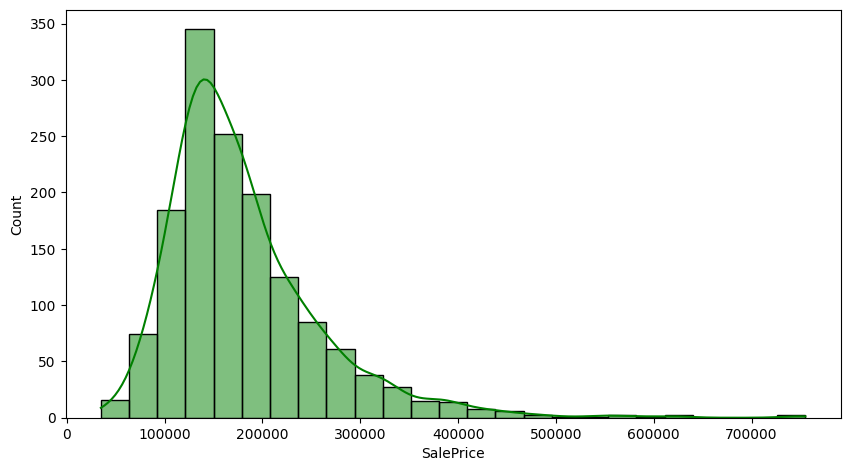

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df_train['SalePrice'], bins=25,kde=True,color='green')
fig.subplots_adjust(bottom=0.2)

**Distribution plot of Numerical Features**

In [15]:
## Numerical features distibution
numeric_df = df_train.select_dtypes(include='number')
numeric_df = numeric_df[numeric_df.columns.difference(['SalePrice'])]
numeric_df.dtypes.value_counts()

int64      33
float64     3
Name: count, dtype: int64

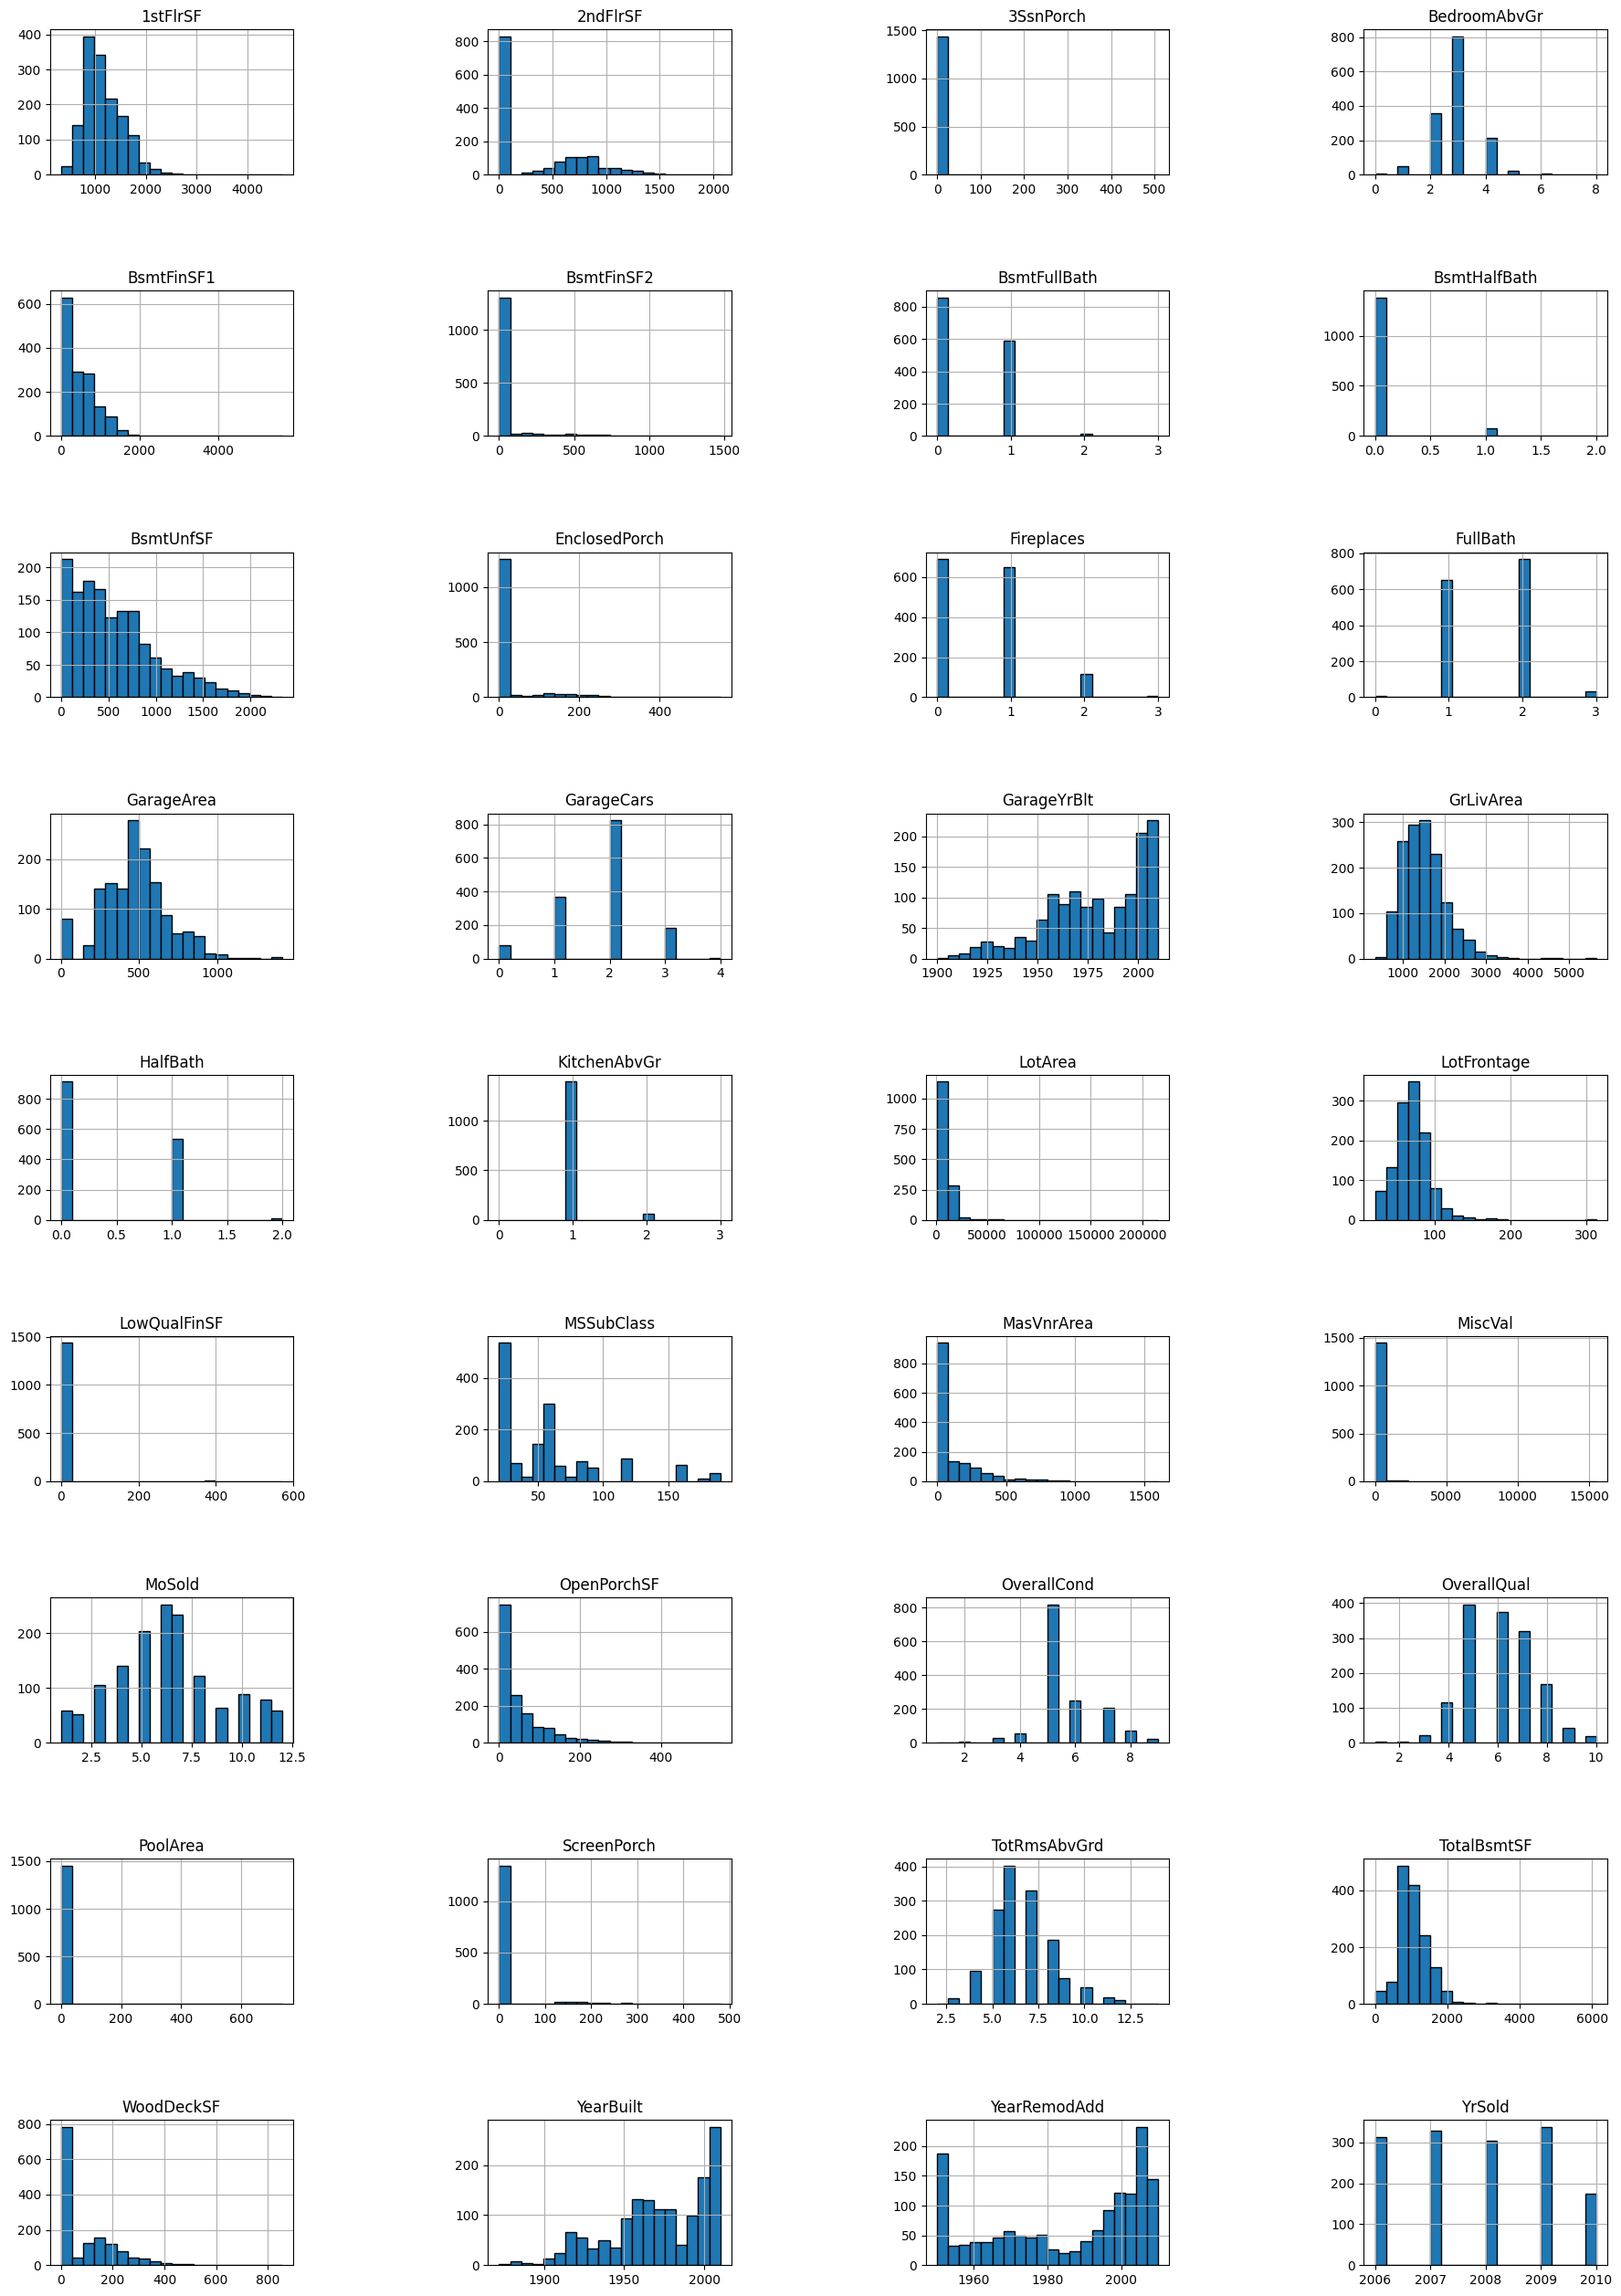

In [16]:
def plot_univariate_numerical_features(df:pd.DataFrame,nrows:int=9, ncol: int=4, figsize: tuple=(22,36),bins:int=20) -> None:    
    numeric_df = df.select_dtypes(include='number')
    numeric_df.hist(bins=bins, figsize=figsize,edgecolor='black',layout=(nrows,ncol))
    plt.subplots_adjust(hspace=0.8,wspace=0.8, bottom=0.2)



plot_univariate_numerical_features(numeric_df)

**Scatter plot for Numerical Features vs Salesprice**

In [17]:
numeric_df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

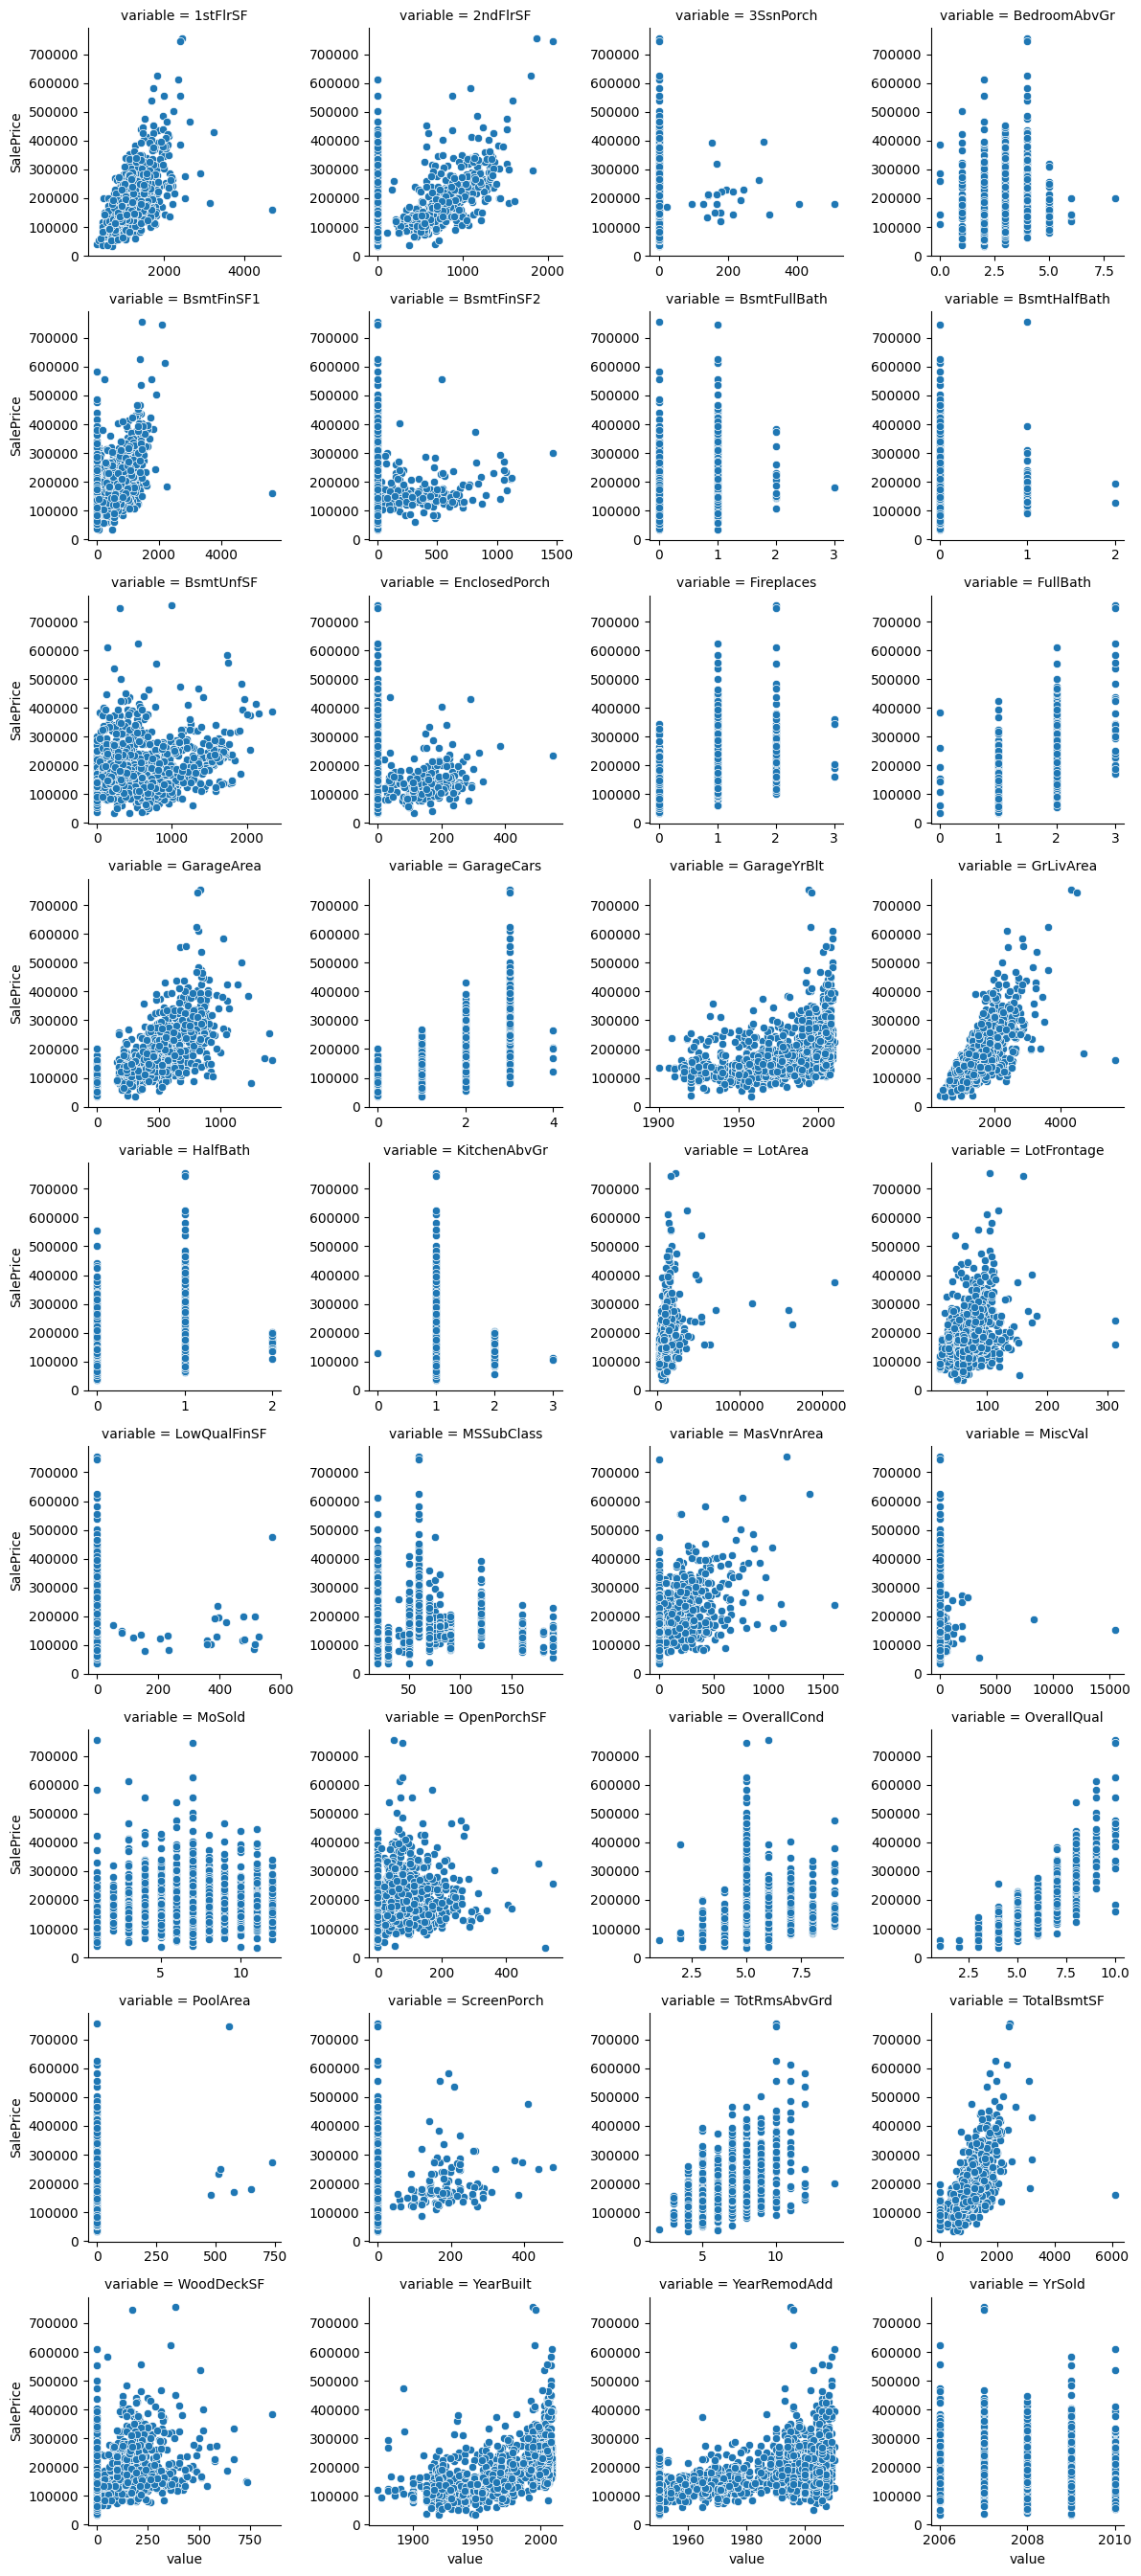

In [18]:
nd = pd.melt(df_train,id_vars='SalePrice',value_vars=numeric_df.columns)
g = sns.FacetGrid(nd, col='variable',col_wrap=4,sharex=False,sharey=False)
n1 = g.map_dataframe(sns.scatterplot,x='value',y='SalePrice')
n1

**Distibution of Categorical dimensions**

In [19]:
cat_df = df_train.select_dtypes(exclude='number')
cat_df.dtypes.value_counts()

object    43
Name: count, dtype: int64

In [20]:
def plot_categorical_dimensions(df:pd.DataFrame) -> None:  
    cat_df = df.select_dtypes(include='object')
    nd_cat = pd.melt(cat_df, value_vars=cat_df.columns)
    fig = plt.figure(figsize=(10,6))
    n2 = sns.FacetGrid(nd_cat, col='variable',col_wrap=4,sharex=False,sharey=False)
    n2 = n2.map_dataframe(sns.countplot, 'value')
    n2.set_xticklabels(rotation=60)
    fig.subplots_adjust(bottom=0.3)
    n2.tight_layout()
 

<Figure size 1000x600 with 0 Axes>

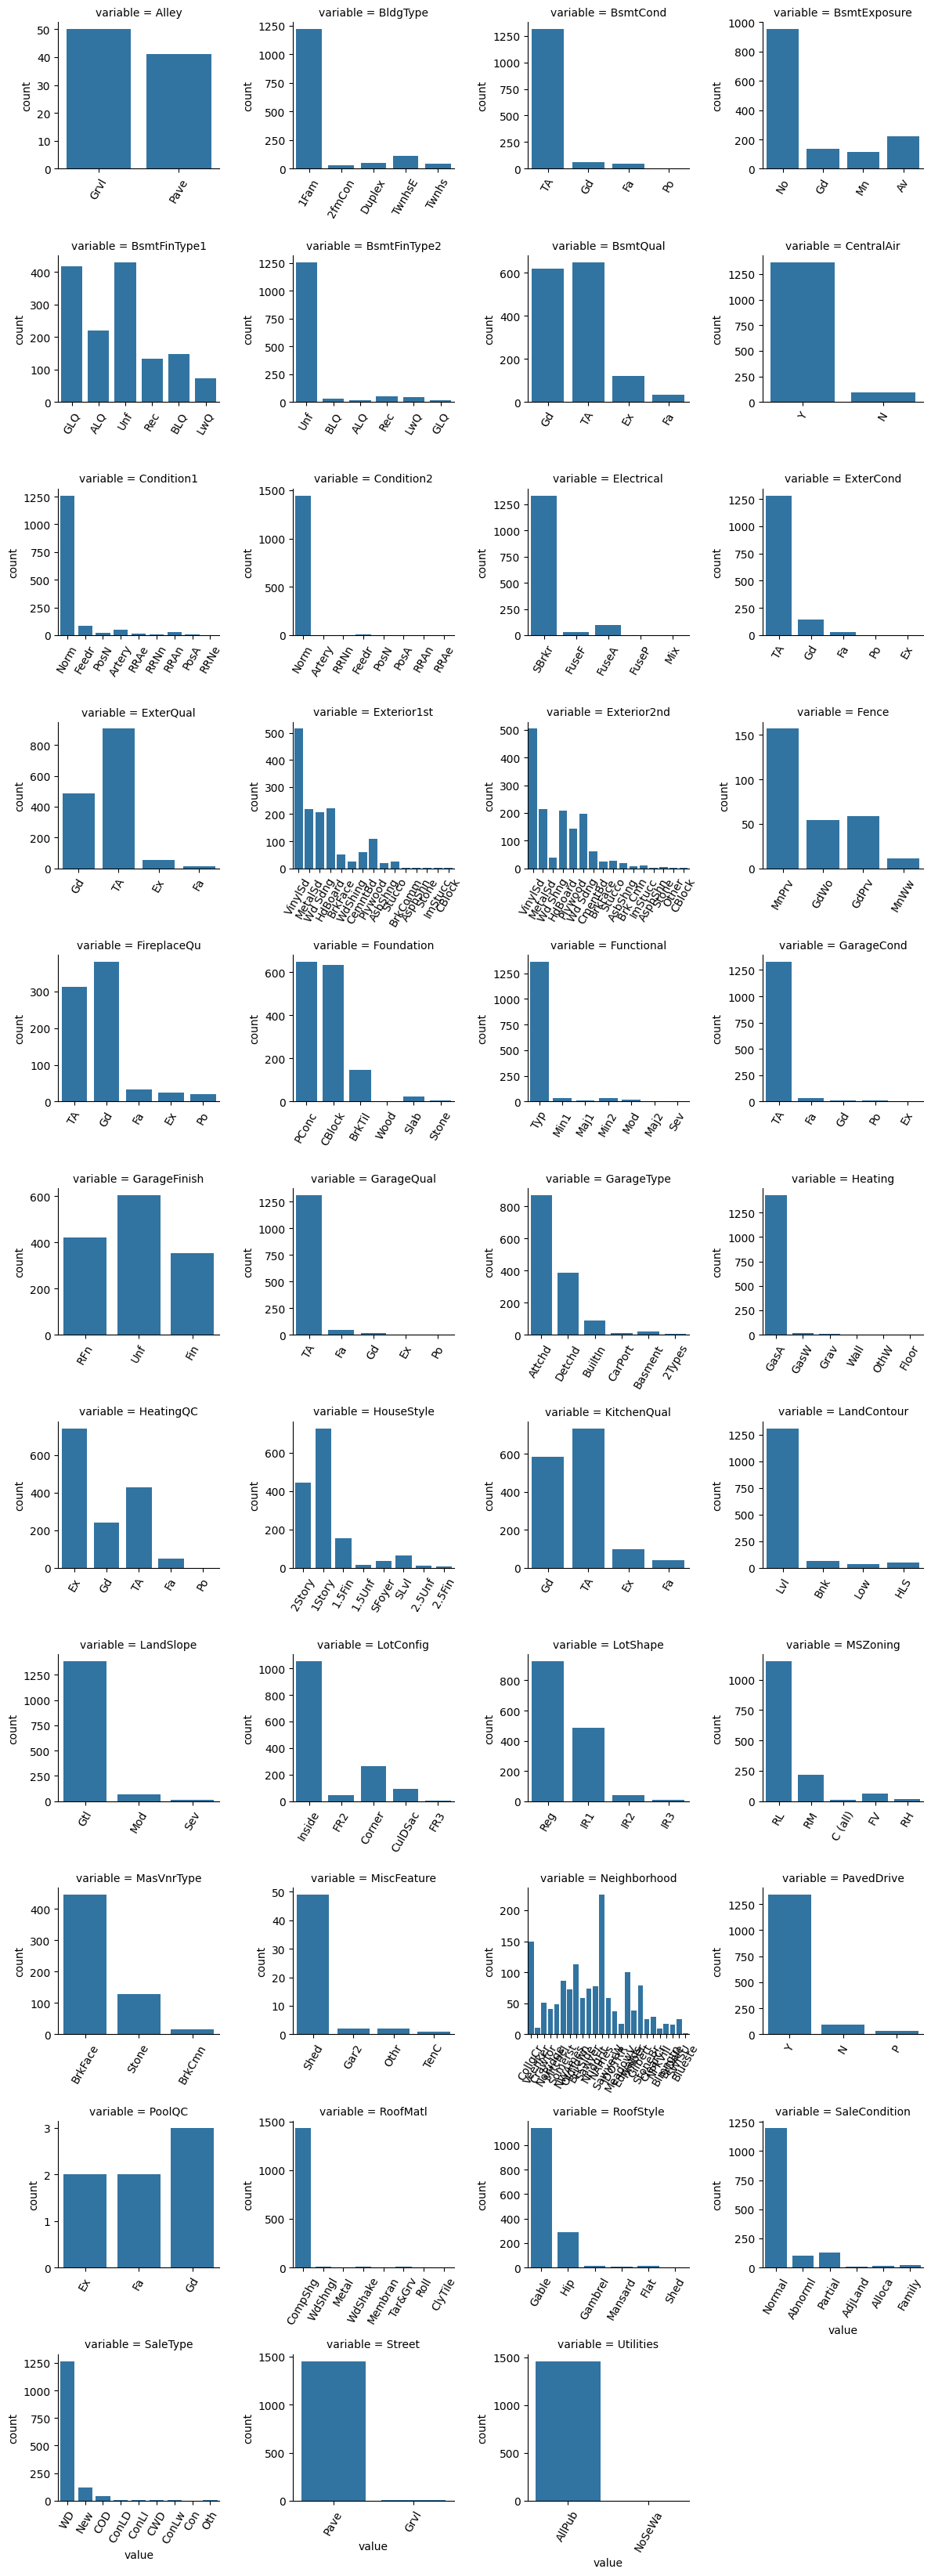

In [21]:
plot_categorical_dimensions(df_train)

**Box plot for categorical dimensions vs Saleprice**

<Figure size 1000x400 with 0 Axes>

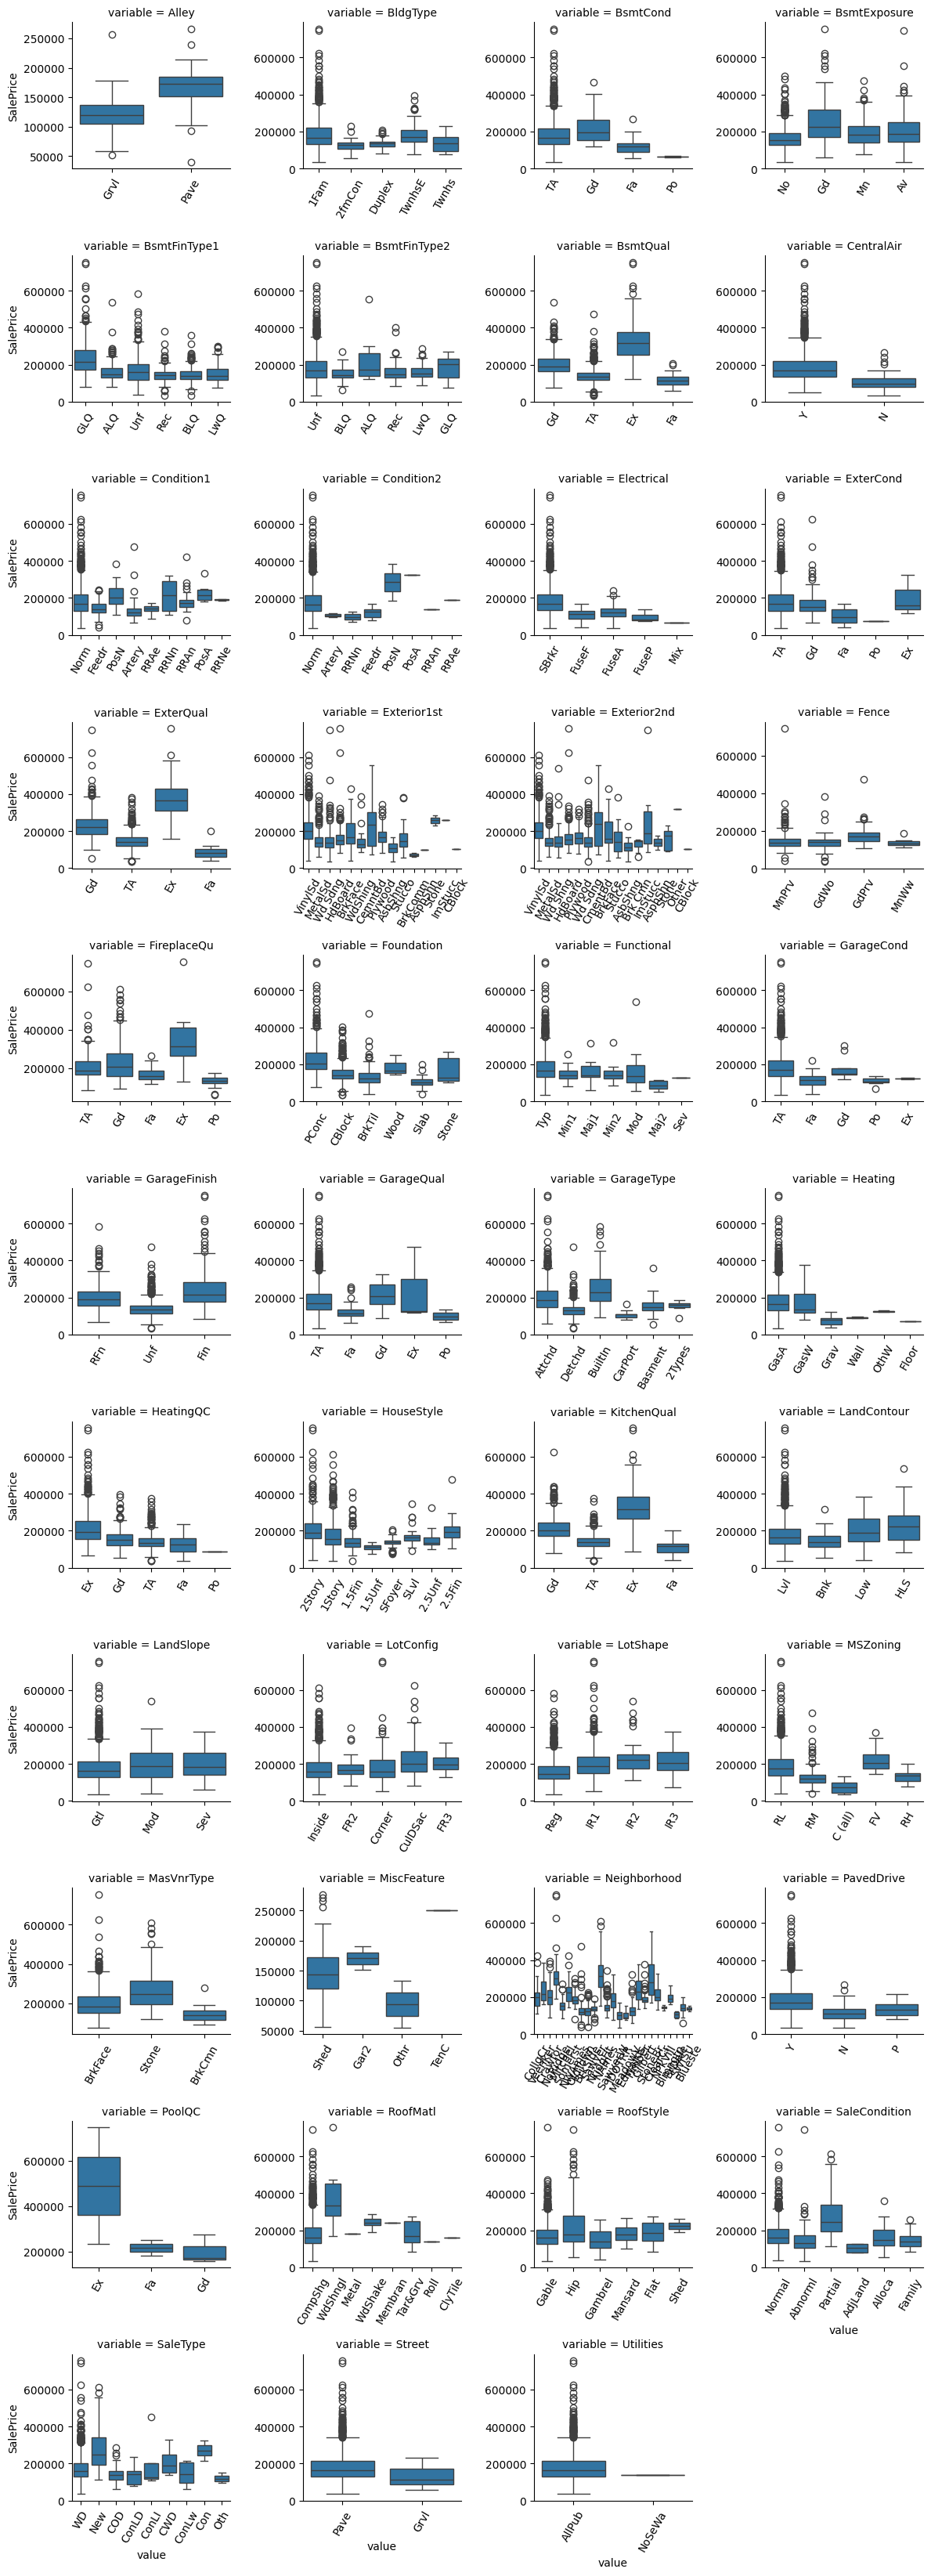

In [22]:
cat_df = df_train.select_dtypes(include='object')
cat_nd = pd.melt(df_train,id_vars='SalePrice',value_vars=cat_df.columns)
fig = plt.figure(figsize=(10,4))
n3 = sns.FacetGrid(cat_nd,col='variable',col_wrap=4, sharex=False,sharey=False)
n3 = n3.map_dataframe(sns.boxplot,'value','SalePrice')
n3.set_xticklabels(rotation=60)
fig.subplots_adjust(bottom=0.3)
n3.tight_layout()


**Number of property sold By Month and Year**

In [23]:
df_train.columns[(df_train.columns.str.contains(pat='mo|yr',case=False))] 

Index(['GarageYrBlt', 'MoSold', 'YearRemodAdd', 'YrSold'], dtype='object')

In [24]:
df_train[['YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1460 non-null   int64  
 1   GarageYrBlt   1379 non-null   float64
 2   MoSold        1460 non-null   int64  
 3   YrSold        1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [25]:
date_df = pd.crosstab(numeric_df['MoSold'],numeric_df['YrSold'])
date_df.style.highlight_max(axis='index',color='blue').highlight_min(axis='index',color='red')

YrSold,2006,2007,2008,2009,2010
MoSold,,,,,
1,10,13,13,12,10
2,9,8,10,10,15
3,25,23,18,19,21
4,27,23,26,26,39
5,38,43,38,37,48
6,48,59,51,59,36
7,67,51,49,61,6
8,23,40,29,30,0
9,15,11,17,20,0


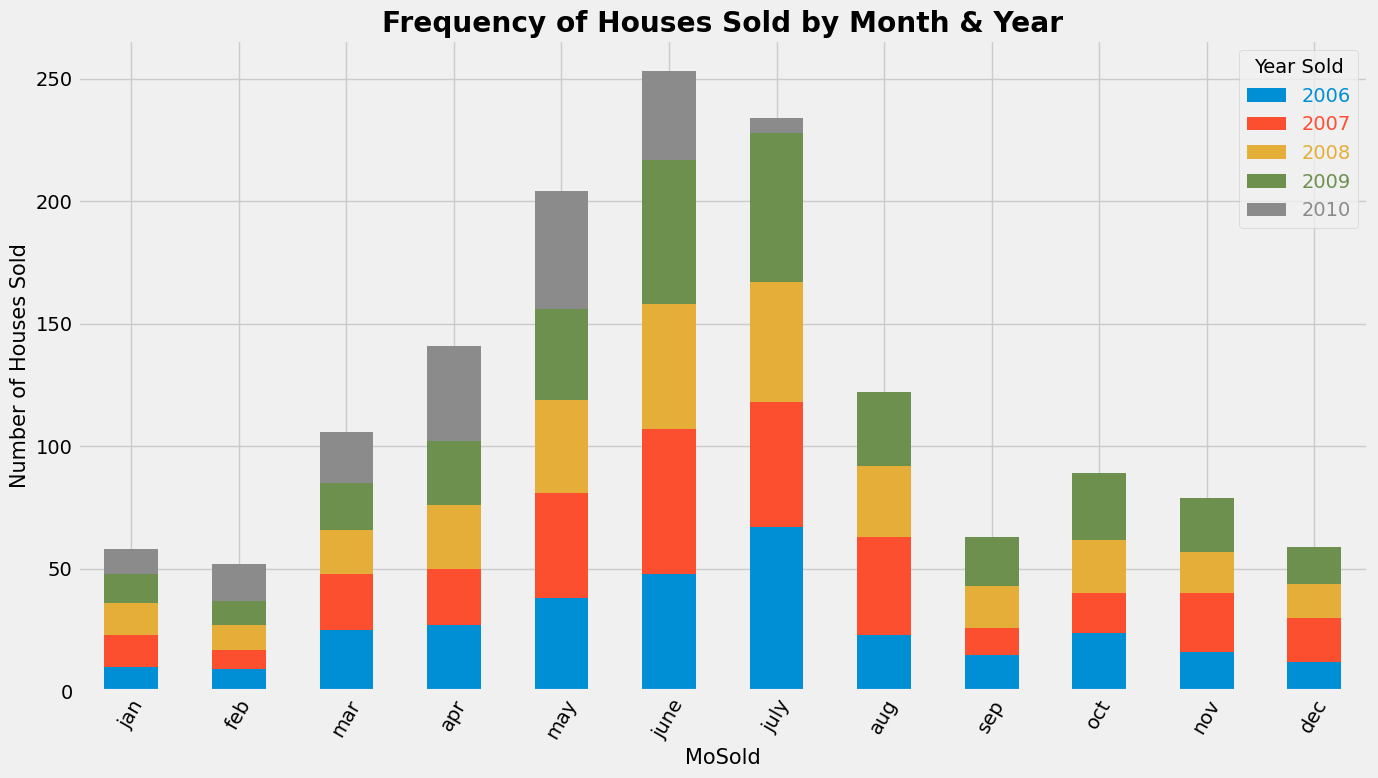

In [26]:
plt.style.use('fivethirtyeight')
date_df.plot(kind='bar',stacked=True,figsize=(14,8))
plt.gca().set_xticks(ticks=np.arange(0,12,1),labels=['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec'],rotation=60)
plt.title('Frequency of Houses Sold by Month & Year',fontweight='bold',loc='center')
plt.ylabel('Number of Houses Sold',fontsize=15)
plt.xlabel('MoSold',fontsize=15)
plt.legend(labelcolor='linecolor',title='Year Sold')
plt.tight_layout()
plt.show()

- **No Sales happened in year 2010 from August to December.**

**SalePrice Behaviour accross Months and Years**

In [27]:
sale_df = pd.pivot_table(data=df_train,index='MoSold',columns='YrSold',values='SalePrice',fill_value=0)
sale_df.style.highlight_max(axis='index',color='blue').highlight_min(axis='index',color='red').format(precision=2)

YrSold,2006,2007,2008,2009,2010
MoSold,,,,,
1,201090.00,183234.62,178504.69,189735.50,163852.60
2,194322.22,176301.75,159370.00,187450.00,174823.33
3,184982.20,176567.78,178505.28,171547.37,203181.29
4,174312.81,170772.61,159293.35,181680.77,171344.03
5,158928.29,169873.51,188334.47,164482.95,178422.25
6,172283.33,179725.81,169730.94,183260.93,181639.58
7,183211.06,195396.84,174562.65,197984.41,121750.00
8,196239.96,183941.08,196076.97,165670.97,0.00
9,223768.87,195533.82,169626.47,196849.35,0.00


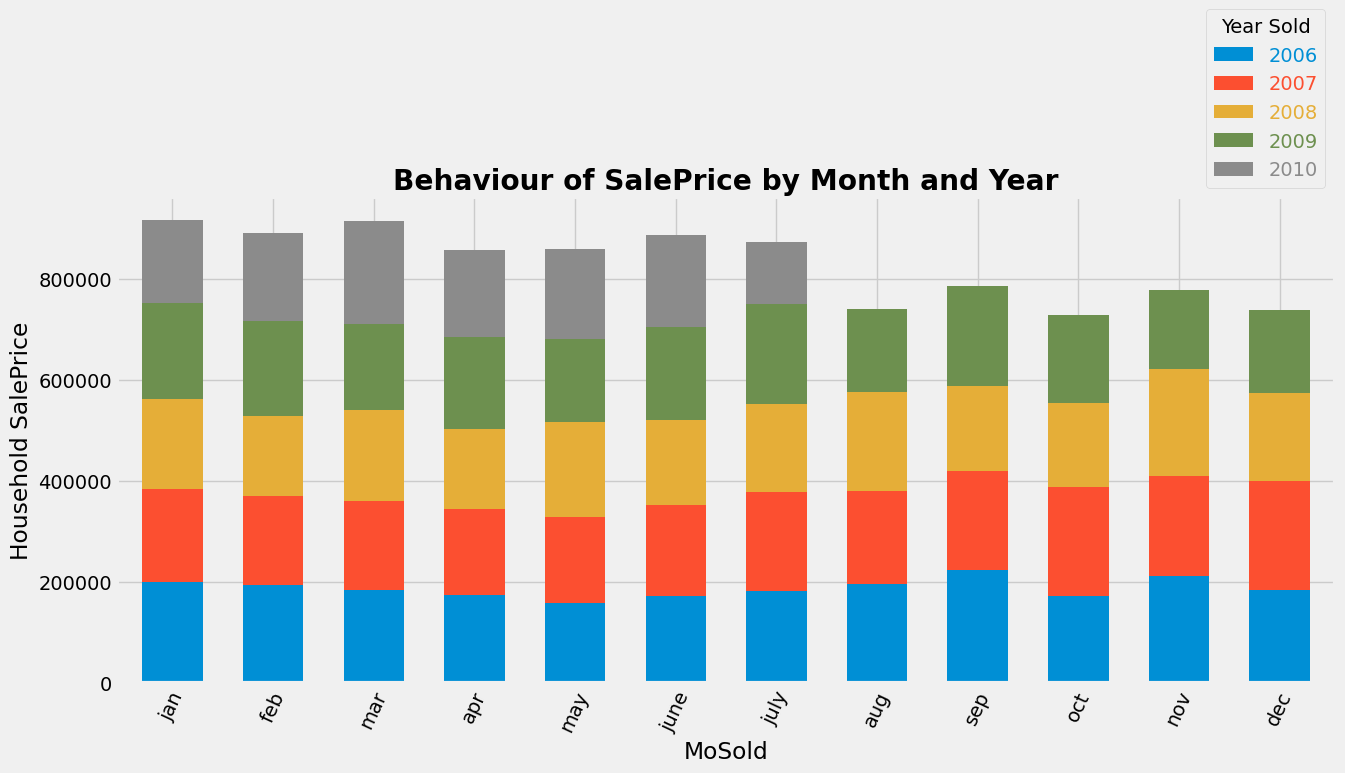

In [28]:
sale_df.plot(kind='bar',stacked=True,width=0.6,figsize=(14,6))
plt.xticks(ticks=np.arange(0,12,1),labels=['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec'],rotation=65)
plt.ylabel('Household SalePrice')
plt.title('Behaviour of SalePrice by Month and Year',fontweight='bold')
plt.legend(loc='lower right',bbox_to_anchor = (1,1),title='Year Sold',labelcolor='linecolor')
plt.show()

**Check Duplicates**

In [29]:
df_train.duplicated().sum()

np.int64(0)

In [30]:
df_test.duplicated().sum()

np.int64(0)

**Outliers in columns before Missing value Imputation**

In [31]:
"""
Calculate the percentage of outliers based on winsorization method for all the numerical features in the DataFrame.

Parameters:
df(pd.DataFrame): The input DataFrame containing numerical features.
lower_percentile(float): The lower percentile foe winsorization. Default is 5.
upper_percentile(float): The upper percentile for winsorization. Default is 95.

Returns:
pd.DataFrame : A DataFrame containing the columns name and percentage of outliers for each numerical features.
"""

#numeric_df = df_train[df_train.columns.difference(['SalePrice'])]
numeric_df = numeric_df.select_dtypes(include='number')
outliers_percentages = {}
for col in numeric_df.columns:
    x_low, x_high = np.percentile(numeric_df[col].dropna(),[1,99])
    total_values = len(numeric_df[col])
    outliers = len(numeric_df[~numeric_df[col].between(x_low,x_high)])
    outliers_percentage = round((outliers / total_values)*100 , 2)
    outliers_percentages[col] = outliers_percentage
    
outliers_df = pd.DataFrame(list(outliers_percentages.items()), columns=['Features','Outliers Percentage'])
print(outliers_df.sort_values(by='Outliers Percentage', ascending=False).reset_index(drop=True))



         Features  Outliers Percentage
0     LotFrontage                18.56
1     GarageYrBlt                 6.44
2       GrLivArea                 2.05
3        1stFlrSF                 1.85
4      MasVnrArea                 1.58
5         LotArea                 1.51
6       YearBuilt                 1.10
7        2ndFlrSF                 1.03
8      GarageArea                 1.03
9     ScreenPorch                 1.03
10     BsmtFinSF1                 1.03
11     BsmtFinSF2                 1.03
12    OpenPorchSF                 1.03
13      BsmtUnfSF                 1.03
14     WoodDeckSF                 1.03
15    TotalBsmtSF                 1.03
16  EnclosedPorch                 1.03
17   BedroomAbvGr                 0.96
18   LowQualFinSF                 0.96
19        MiscVal                 0.96
20      3SsnPorch                 0.89
21   TotRmsAbvGrd                 0.89
22       HalfBath                 0.82
23       FullBath                 0.62
24       PoolArea        

## Missing Value Analysis and Treatment

In [32]:
def plot_null_counts(df: pd.DataFrame, top_n: int = 15) -> pd.DataFrame: 
    null_info = df.stb.missing().reset_index().rename({'index':'Features'},axis='columns').sort_values(by='percent',ascending=False)
    null_info['columns_dtype'] = [df[col].dtype for col in null_info['Features']]

    null_info = null_info.loc[null_info['missing']>0].head(top_n)
    print(null_info)

    plt.figure(figsize=(8,6))
    sns.barplot(x='percent', y='Features',data=null_info)
    plt.title('Top Features with Highest Percentage of Null Values')
    plt.xlabel('% Null Values')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    return

        Features  missing  total  percent columns_dtype
0         PoolQC     1453   1460    99.52        object
1    MiscFeature     1406   1460    96.30        object
2          Alley     1369   1460    93.77        object
3          Fence     1179   1460    80.75        object
4     MasVnrType      872   1460    59.73        object
5    FireplaceQu      690   1460    47.26        object
6    LotFrontage      259   1460    17.74       float64
7   GarageFinish       81   1460     5.55        object
8    GarageYrBlt       81   1460     5.55       float64
9     GarageCond       81   1460     5.55        object
10    GarageQual       81   1460     5.55        object
11    GarageType       81   1460     5.55        object
12  BsmtFinType2       38   1460     2.60        object
13  BsmtExposure       38   1460     2.60        object
14  BsmtFinType1       37   1460     2.53        object


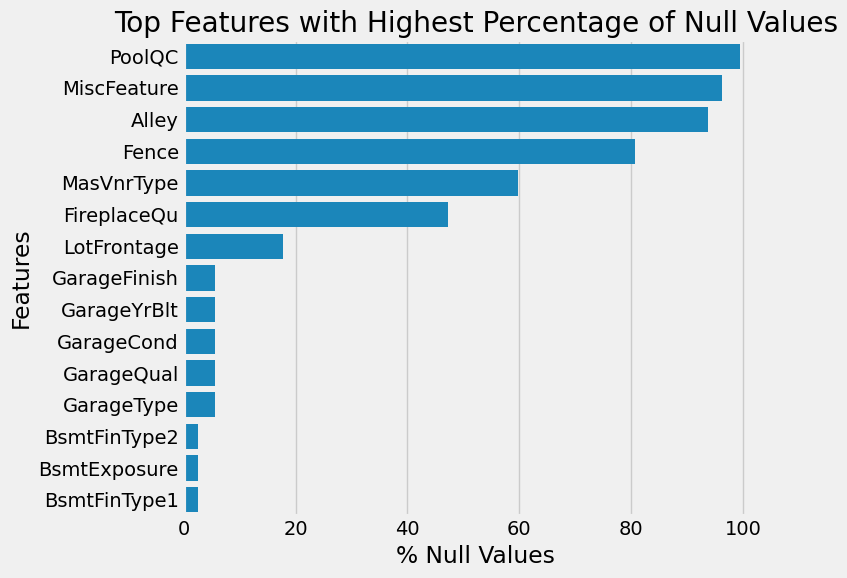

In [33]:
plot_null_counts(df_train)

**Most(>50%) missing values are of categorical features.**

In [34]:
"""
Fill missing  values in DataFrame for both categorical and numerical features based on particular rules.

Parameters:
    df(pd.DataFrame): The input DataFrame with missing values.
    cat_threshold(float): The threshold for handling missing values in categorical features.

Returns:
    pd.DataFrame 
    A dataframe with no missing values.

Rules for missing values:
1. Categorical Featues:
    - if missing values are less than threshold, fill with overall mode value of the column.
    - if greater than threshold, fill with unkown.
2. LotFrontage and GarageYrBlt:
   - Fill using groupby median based on relevent or related columns.
3. Other numeric columns:
   - Fill missing value with the overall missing value of the column.

"""

def fill_missing_values(df:pd.DataFrame, cat_threshold: float = 0.5) -> pd.DataFrame:

    # Make acopy of original DataFrame
    X = df.copy()


    cat_df = df.select_dtypes(include=['object','category'])
    numeric_df = df.select_dtypes(include=['number'])

    # Handle missing values in categorical features
    for col in cat_df.columns:
        if cat_df[col].isnull().sum()/len(cat_df) < cat_threshold:
            df[col].fillna(df[col].mode()[0],inplace=True)
        else:
            df[col].fillna('unknown',inplace=True)
    
    # Handle missing values in numerical features
    # Handle 'LotFrontage' with groupby median imputation
    if 'LotFrontage' in numeric_df.columns:
        df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
        
    # Handle other numeric columns with median imputation
    for col in numeric_df.columns.difference(['LotFrontage']):
        if df[col].isnull().sum()>0:
            df[col] = df[col].fillna(df[col].median())
    return 

In [35]:
fill_missing_values(df_train)

In [36]:
df_train.isnull().sum().any().sum() # no missing values in dataframe so missing Analysis and Treatment is done.

np.int64(0)

## Outlier Analysis and Treatment

Lets look at percentage of possible outliers in numerical features. 

In [37]:
"""
Calculate the percentage of outliers based on winsorization method for all the numerical features in the DataFrame.

Parameters:
df(pd.DataFrame): The input DataFrame containing numerical features.
lower_percentile(float): The lower percentile foe winsorization. Default is 5.
upper_percentile(float): The upper percentile for winsorization. Default is 95.

Returns:
pd.DataFrame : A DataFrame containing the columns name and percentage of outliers for each numerical features.
"""
def calculate_outlier_percentage(df:pd.DataFrame, lower_percentile: float=1, upper_percentile: float=99) -> pd.DataFrame:
    
    numeric_df = df.select_dtypes(include='number').columns
    var = []
    outlier = []
    
    #df = X.copy()
    for col in numeric_df:

        x_low, x_high = np.percentile(df[col],[1,99])
        total_values = len(df[col])
        outliers = len(df[~df[col].between(x_low,x_high)])
        outliers_percentage = round((outliers / total_values)*100 , 2)
        var.append(col)
        outlier.append(outliers_percentage)
    
    outliers_df = pd.DataFrame(zip(var, outlier), columns = ['Features', 'Outliers Percentage'])
    return outliers_df

anamoly_df = calculate_outlier_percentage(df_train)
print(anamoly_df.sort_values(by='Outliers Percentage', ascending=False).reset_index(drop=True))


         Features  Outliers Percentage
0       GrLivArea                 2.05
1       SalePrice                 2.05
2        1stFlrSF                 1.85
3         LotArea                 1.51
4     GarageYrBlt                 1.23
5       YearBuilt                 1.10
6      WoodDeckSF                 1.03
7      BsmtFinSF1                 1.03
8        2ndFlrSF                 1.03
9     OpenPorchSF                 1.03
10      BsmtUnfSF                 1.03
11    LotFrontage                 1.03
12     BsmtFinSF2                 1.03
13     GarageArea                 1.03
14     MasVnrArea                 1.03
15    TotalBsmtSF                 1.03
16    ScreenPorch                 1.03
17  EnclosedPorch                 1.03
18   BedroomAbvGr                 0.96
19        MiscVal                 0.96
20   LowQualFinSF                 0.96
21      3SsnPorch                 0.89
22   TotRmsAbvGrd                 0.89
23       HalfBath                 0.82
24       FullBath        

In [38]:
# Exclude this outliers from the DataFrame
df_new = df_train[~((df_train['LotFrontage'] > 300) | (df_train['LotArea'] > 100000) | (df_train['GrLivArea'] > 3200) | (df_train['MasVnrArea'] > 1500) | (df_train['OpenPorchSF'] > 500))]
df_new.shape


(1438, 80)

# Feature Engineering

**Create New Features**

In [39]:
df_new['TotalSqFt'] = df_new['TotalBsmtSF'] + df_new['1stFlrSF'] + df_new['2ndFlrSF']
df_new['YrRemodAge'] = df_new['YrSold'] - df_new['YearRemodAdd']
df_new['TotalBath'] = df_new['BsmtFullBath'] + 0.5 * df_new['BsmtHalfBath'] + df_new['FullBath'] + 0.5 * df_new['HalfBath']
df_new['HouseAge'] = df_new['YrSold'] - df_new['YearBuilt']
df_new['GarageAge'] = df_new['YrSold'] - df_new['GarageYrBlt']
df_new['TotalPorchSF']  = df_new['3SsnPorch'] + df_new['EnclosedPorch'] + df_new['OpenPorchSF'] + df_new['ScreenPorch']


In [40]:
X,y = (
    df_new[df_new.columns.difference(['SalePrice'])],
    df_new['SalePrice']
)

In [41]:
print(X.shape);
print(y.shape)

(1438, 85)
(1438,)


# Feature Selection

**For Numerical Features**

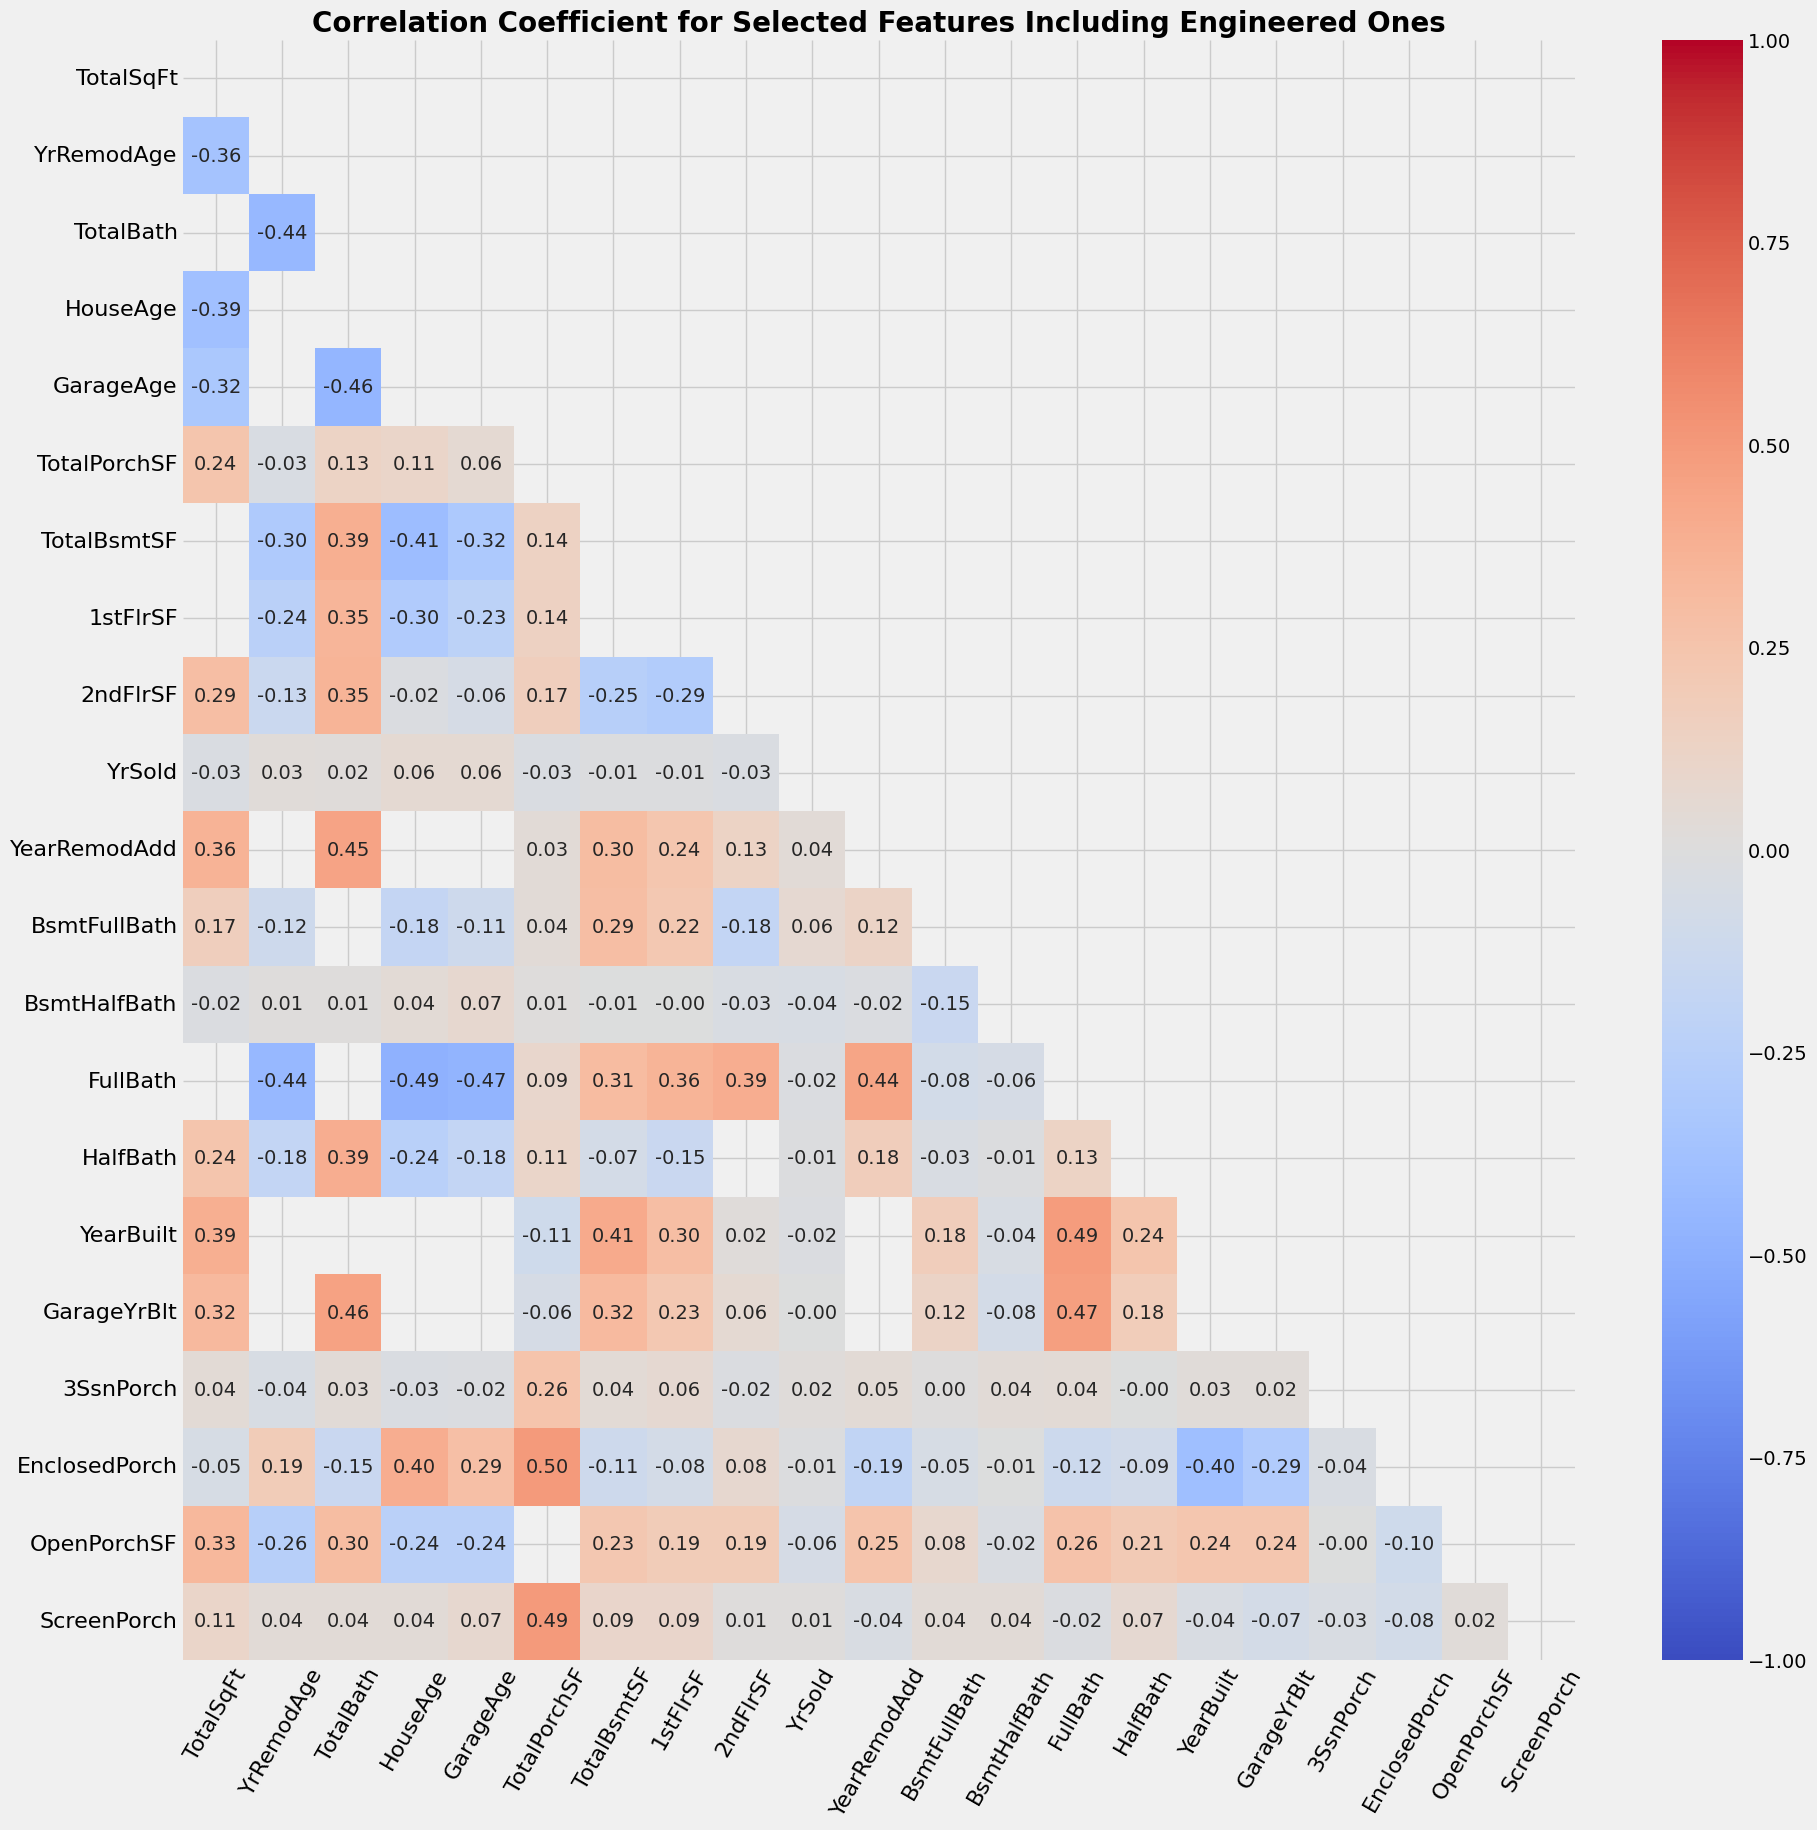

In [42]:
# Select old and new features
selected_features = ['TotalSqFt', 'YrRemodAge', 'TotalBath', 'HouseAge', 'GarageAge', 'TotalPorchSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                    'YrSold','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','YearBuilt','GarageYrBlt',
                    '3SsnPorch','EnclosedPorch','OpenPorchSF','ScreenPorch']
# Compute the correlations for the selected features
corr_matrix = X[selected_features].corr()

# Generate a mask for the  upper triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', mask=mask|(abs(corr_matrix)>0.5), cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Coefficient for Selected Features Including Engineered Ones', fontsize=20, fontweight='bold')
plt.xticks(rotation=60, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Selecting Top-n Numerical Features

**Use r_regression and f_regression from sklearn**

r_regression computes pearsons'r for each features and the target.

pearsons'r also known as Pearson Correlation Coefficient.

Linear model for testing the individual effect of each of many regressors.This is a scoring function to be used in feature selection procedure, not free standing feature selection procedure.

The cross correlation between each regressor and the target is computed as :

<span style="background-color: #00eeee">E[(X[:, i] - mean(X[:, i]))*(y-mean(y))] / (std(X[:, i])*std(y))</span>


**Feature Selection f_regression vs r_regression**

Both f_regression and r_regression are used to select feature selection based on linear relationship between the feature and the target variable.

- **f_regression** is preferred because it provides F-scores and p-values to access feature importance,independent
of positive and negative associations.

- **r_regression** computes Pearson correlation coefficient, returns values between -1 and 1, but lacks p-values and F-scores, making it less useful for assessing statistical significance.

For downstream estimators, **f_regression** is typically favored for its statistical rigor.

In [43]:
from sklearn.feature_selection import f_regression, r_regression

In [53]:
# Compute f_regression scores
f_score, p_value = f_regression(X.select_dtypes(include='number'),y)


# Create DataFrame with scores
df_score = pd.DataFrame({'Feature':X.select_dtypes(include='number').columns,
                         'F-score':f_score, 'P-value':p_value})
df_score.sort_values(by=['F-score','P-value'],ascending=False,inplace=True)#.reset_index(drop=True)

# Select top features
top_feature = df_score#.head(35)
top_feature.reset_index(drop=True)

,Feature,F-score,P-value
0,TotalSqFt,2909.35,0.00
1,OverallQual,2631.54,0.00
2,GrLivArea,1410.18,0.00
3,GarageCars,1062.05,0.00
4,TotalBsmtSF,1028.55,0.00
5,GarageArea,988.97,0.00
6,TotalBath,919.51,0.00
7,1stFlrSF,875.11,0.00
8,HouseAge,700.37,0.00
9,YearBuilt,699.88,0.00


*****Feature Selection based on F-score and P-value*****

Based on F-scores and P-values, the following conclusions can be drawn:

**Features To Keep:**
    - 


In [45]:
# compute vif for all given features
def calculate_vif(df:pd.DataFrame):

    # select numeric columns
    num_df = df.select_dtypes(include='number')
    # the computation of variance inflatio required constant
    num_df['intercept'] = 1

    # create DataFrame to store vif values
    vif = pd.DataFrame()
    vif['Features'] = num_df.columns
    vif['VIF'] = [variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])]
    vif[vif['Features'] != 'intercept']
    return(vif)

# Criterion : Remove variable with vif > 5

In [46]:
calculate_vif(X).sort_values(by='VIF',ascending=True)#.reset_index(drop=True)

,Features,VIF
25,MiscVal,1.02
30,PoolArea,1.05
26,MoSold,1.05
37,WoodDeckSF,1.22
24,MasVnrArea,1.37
20,LotArea,1.52
10,Fireplaces,1.56
28,OverallCond,1.58
19,KitchenAbvGr,1.62
21,LotFrontage,1.66


## Selecting top-n Categorical Features

**Use Cramers_v and Anova Test**

**Cramers'V** is a measure of association between two categorical features that returns a value between 0(weak) and 1(strong)

In [ ]:
def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    minDim = min(confusion_matrix.shape) - 1
    V = np.sqrt((chi2 / n) / minDim)
    return V, p

def filter_strong_associations(df, cramer_threshold = 0.3, p_value_threshold = 0.05):
    """
    Calculate Cramér's V and chi-squared test for each pair of categorical features and 
    return a DataFrame with pairs that have a Cramér's V value greater than cramer_threshold 
    and p-value less than p_value_threshold.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the features.
    cramer_threshold (float, optional): The threshold for Cramér's V value. Default is 0.1.
    p_value_threshold (float, optional): The threshold for p-value. Default is 0.05.
    
    Returns:
    pd.DataFrame: A DataFrame with pairs of columns, Cramér's V values, and p-values.
    """
    categorical_columns = df.select_dtypes(include='object').columns
    results = []

    for col1, col2 in combinations(categorical_columns, 2):
        V, p = cramers_v(df[col1], df[col2])
        if V > cramer_threshold and p < p_value_threshold:
            results.append({'Column1': col1, 'Column2': col2, 'Cramérs_V': V, 'p-value': p})
    
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
strong_associations = filter_strong_associations(df_train)
print(strong_associations)


          Column1       Column2  Cramérs_V  p-value
0           Alley      MSZoning       0.39     0.00
1           Alley  Neighborhood       0.45     0.00
2        BldgType  Neighborhood       0.44     0.00
3        BsmtCond    Electrical       0.42     0.00
4    BsmtFinType1      BsmtQual       0.33     0.00
5    BsmtFinType1  Neighborhood       0.33     0.00
6        BsmtQual     ExterQual       0.47     0.00
7        BsmtQual   Exterior1st       0.34     0.00
8        BsmtQual   Exterior2nd       0.33     0.00
9        BsmtQual    Foundation       0.41     0.00
10       BsmtQual  GarageFinish       0.42     0.00
11       BsmtQual   KitchenQual       0.42     0.00
12       BsmtQual  Neighborhood       0.55     0.00
13     CentralAir    Electrical       0.42     0.00
14     CentralAir   Exterior1st       0.36     0.00
15     CentralAir   Exterior2nd       0.35     0.00
16     CentralAir    Foundation       0.37     0.00
17     CentralAir       Heating       0.46     0.00
18     Centr

In [48]:
def cramers_v(x,y):
    """Calculate Cramer's V statistic for two categorical variables."""
    confusion_matrix = pd.crosstab(x,y) # compute Contigency_table
    chi2, p, dof, expected = chi2_contingency(confusion_matrix) # compute chi2 statistic
    n = confusion_matrix.sum().sum() # total number of observations
    min_dim = min(confusion_matrix.shape) - 1 # minimum dimsension of the confusion matrix
    V = np.sqrt((chi2 / n) / min_dim) # Cramer's V statistic
    return V, p

def filter_strong_association(df:pd.DataFrame, cramers_v_threshold: float = 0.3, p_value_threshold: float = 0.05):
    """
    Calculate Cramers'V and chi-squared test for each pair of categorical features and return a DataFrame with
    pairs that have a Cramers'V value grater than cramers_v_threshold and p_value less than p_value_threshold.
    
    Parameters:
    df(pd.DataFrame): The input DataFrame containing categorical features.
    cramers_v_threshold(float) : The threshold of cramers'V value. Default is 0.1.
    p_value_thrshold(float): The threshold of p_value. Default is 0.5

    Returns:
    pd.DataFrame: A DataFrame containing pairs of categorical features with their Cramers'V values and p-values.
    """
    cat_var = df.select_dtypes(include='object').columns
    results = []

    for col1, col2 in combinations(cat_var, 2):
        V, p_value = cramers_v(df[col1], df[col2])
        if V > cramers_v_threshold and p_value < p_value_threshold:
            results.append({
                'Feature1': col1,
                'Feature2': col2,
                'Cramers_v': V,
                'P_value': p_value})
    
    results_df = pd.DataFrame(results)
    return results_df

# Example Usage
strong_association = filter_strong_association(df_train)
print(strong_association)

         Feature1      Feature2  Cramers_v  P_value
0           Alley      MSZoning       0.39     0.00
1           Alley  Neighborhood       0.45     0.00
2        BldgType  Neighborhood       0.44     0.00
3        BsmtCond    Electrical       0.42     0.00
4    BsmtFinType1      BsmtQual       0.33     0.00
5    BsmtFinType1  Neighborhood       0.33     0.00
6        BsmtQual     ExterQual       0.47     0.00
7        BsmtQual   Exterior1st       0.34     0.00
8        BsmtQual   Exterior2nd       0.33     0.00
9        BsmtQual    Foundation       0.41     0.00
10       BsmtQual  GarageFinish       0.42     0.00
11       BsmtQual   KitchenQual       0.42     0.00
12       BsmtQual  Neighborhood       0.55     0.00
13     CentralAir    Electrical       0.42     0.00
14     CentralAir   Exterior1st       0.36     0.00
15     CentralAir   Exterior2nd       0.35     0.00
16     CentralAir    Foundation       0.37     0.00
17     CentralAir       Heating       0.46     0.00
18     Centr

In [63]:
def cramers_v(x,y):
    """ Calculate Cramers'V statistics for two categorical variables."""
    confusion_matrix = pd.crosstab(x,y) # compute contigency table
    chi2, p, dof, expected = stats.chi2_contingency(confusion_matrix) # compute chi2 statistics
    n = confusion_matrix.sum().sum() # total number of observations
    min_dim = min(confusion_matrix.shape) - 1 # minimum dimension of confusion matix
    V = np.sqrt((chi2 / n) / min_dim) # calculate cramers'V statistics
    return V

def visualization_cramers_v_matrix(df:pd.DataFrame):
    """
    Calculate Cramer's V matrix for all the pairs of categorical features.
     
    Parameters:
    df(pd.DataFrame): The input DataFrame containing categprical features.

    Returns:
    pd.DataFrame: A DataFrame contianing pairs of categorical features with their Cramers' V values greater than the cramers_v_threshold.
    """
    # Select categorical features
    cat_df = df.select_dtypes(include='object')
    cat_var = cat_df.columns
    cramers_result = pd.DataFrame(index=cat_var.to_list(), columns=cat_var.to_list())    
    
    for col1 in cat_var:
        for col2 in cat_var:
            if col1 != col2:
                cramers_result.loc[col1, col2] = cramers_v(cat_df[col1], cat_df[col2])
            else:
                cramers_result.loc[col1, col2] = 1

    cramers_result = cramers_result.astype('float')
    return cramers_result
    


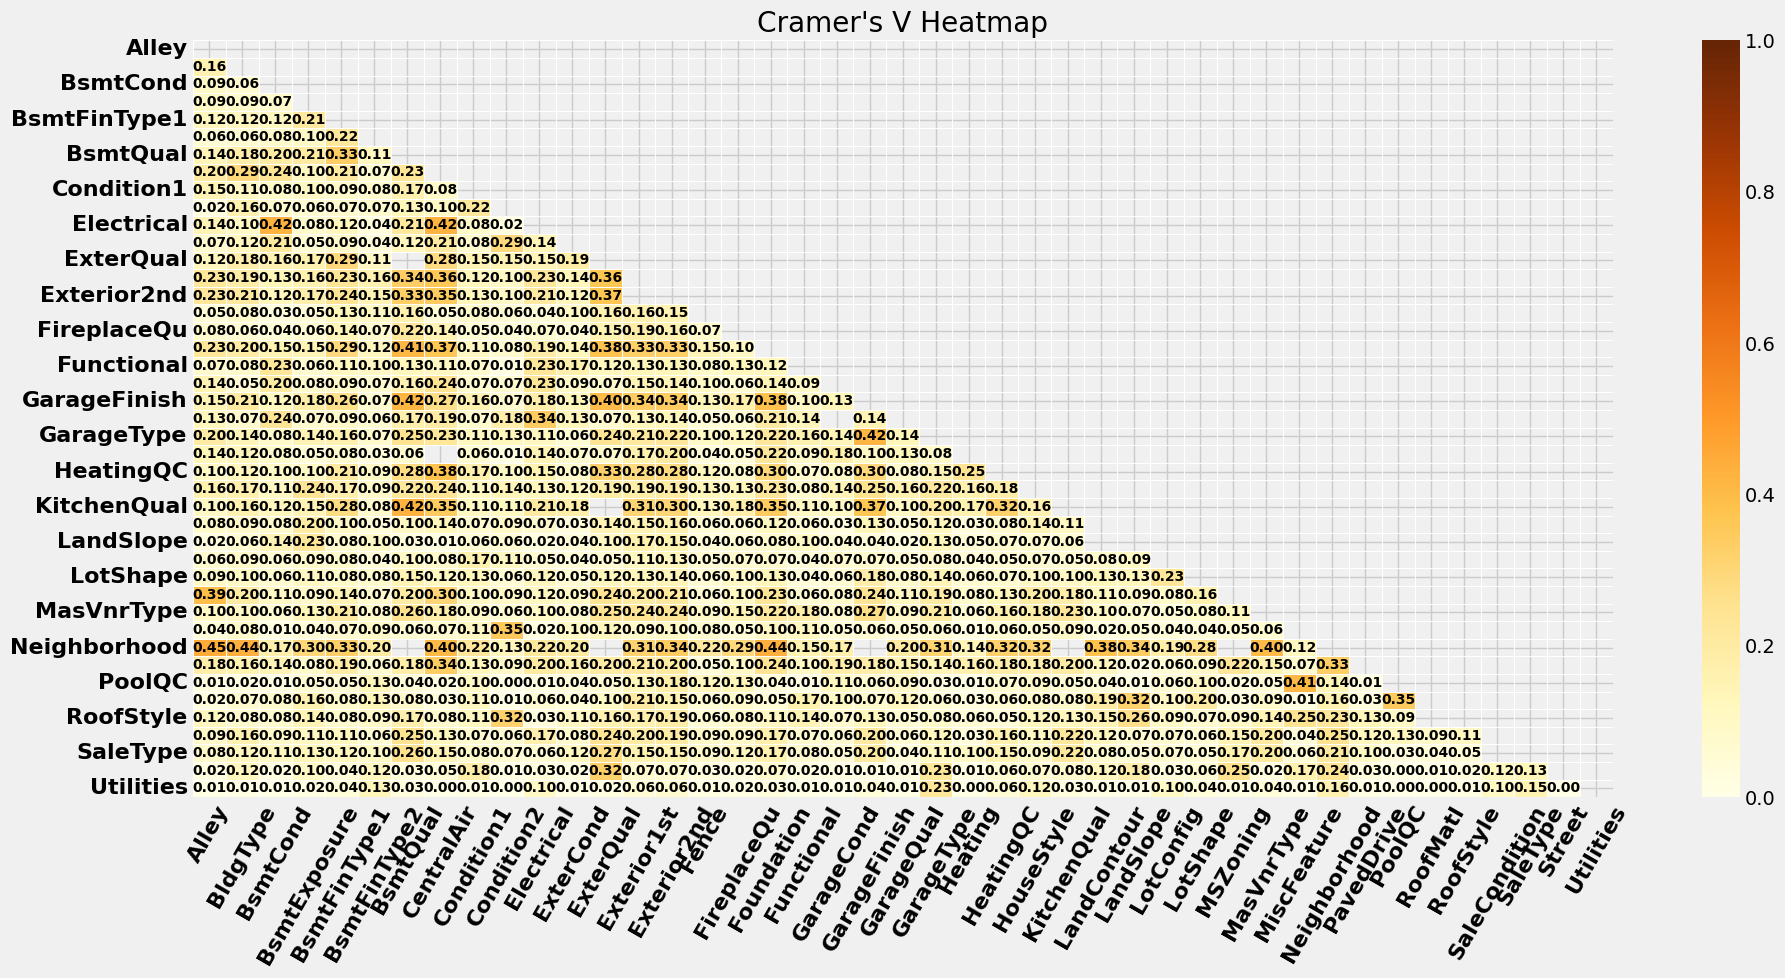

In [76]:
cramers_results = visualization_cramers_v_matrix(df_train)
plt.figure(figsize=(20,10))
mask = np.zeros_like(cramers_results, dtype='bool')
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cramers_results, annot=True,fmt='.2f',mask=mask|abs((cramers_results)>0.45), cmap='YlOrBr', 
            linewidths=0.5,vmin=0 ,vmax=1,annot_kws={'fontsize':10, 'fontweight': 'bold', 'color': 'black'})
plt.title("Cramer's V Heatmap")
plt.xticks(fontsize=16, fontweight='bold', rotation=60)
plt.yticks(fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# Categorical Features Importance with Target Variable

In [50]:
def calculate_anova_test(df: pd.DataFrame, target: Union[str, pd.Series]) -> pd.DataFrame:
    """
    Perfrom ANOVA test to assess the realtionship between categorical features and a numerical target variable.

    Parameters:
    df(pd.DataFrame): The input DataFrame containing categorical features and a numerical target variable.
    target_variable(str or pd.Series): The name of the target variable or standalone series.

    Returns:
    pd.DataFrame: A DataFrame containg the ANOVA F-values and p-values for each categorical features.
    """
    # Check if target is a string(columns name) or a Series
    if isinstance(target, str):
        # Ensure the target variable in the DataFrame
        if target not in df.columns:
            raise ValueError(f"Target variable '{target}' is not found in the DataFrame.")
        target_data = df[target]
    elif isinstance(target, pd.Series):
        # if the target is a Series, use it directly
        target_data = target
    else:
        raise TypeError('Target variable must be a string or a pandas Series.')
    
    # Select Categorical features
    cat_columns = df.select_dtypes(include='object').columns

    # store results
    results = []

    for col in cat_columns:
        # Group the numerical data by the categorical column
        groups = [target_data[df[col] == category] for category in df[col].unique()]
        # Perform ANOVA test
        f_value, p_value = stats.f_oneway(*groups)
        # Append the results to the list
        results.append({
            'Feature': col,
            'F_value': f_value,
            'P_value': p_value
        })
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    # Sort the DataFrame by F_value and P_value in descending order
    results_df.sort_values(by=['F_value', 'P_value'], ascending=False,inplace=True)#.reset_index(drop=True)
    return results_df

In [51]:
calculate_anova_test(df_train, 'SalePrice').reset_index(drop=True)

,Feature,F_value,P_value
0,ExterQual,443.33,0.00
1,BsmtQual,413.95,0.00
2,KitchenQual,407.81,0.00
3,GarageFinish,303.62,0.00
4,MasVnrType,108.91,0.00
5,Foundation,100.25,0.00
6,CentralAir,98.31,0.00
7,HeatingQC,88.39,0.00
8,BsmtExposure,76.58,0.00
9,Neighborhood,71.78,0.00
